# <center> CSM </center>
##  <center> Trabalho Prático 2 </center>


In [1]:
import re
from time import time
from os import path
import numpy as np
import cv2
import matplotlib.pyplot as plt

Este Trabalho explora os conceitos de compressão de dados sem perdas baseados na teoria da informação. Deve
ter em consideração que as funções realizadas devem conter um descrição e recomenda-se o uso de células “Markdown”
para o efeito. Os resultados obtidos devem estar claramente apresentados recomendando-se o uso de gráficos ou tabelas
para o efeito.

1. Elabore uma função (gen_huff_table) que gere uma tabela com o código binário para cada símbolo de um
dado conjunto, usando o método de Huffman. Esta função deve ter como parâmetros de entrada um conjunto de
símbolos e as suas probabilidades (ou em alternativa pode usar o número de ocorrências de cada símbolo, dado
pelo seu histograma). Também pode em alternativa gerar não uma tabela mas outra estrutura de dados com os
códigos pretendidos (ex: dicionário).

In [2]:
def gen_huff_table(file):
    """
    Método que recebe um np.array (ficheiros fornecidos pelo docente)
    e retorna um dicionário com a tabela de huffman correspondente
    @param file: ficheiro
    @return: Tabela de huffman (dicionário)
    """
    # Cria o array com os simbolos únicos da mensagem recebida por ordem crescente.
    symbols = np.unique(file)
    
    # Nº de vezes que ocorre cada símbolo
    ocurrences = np.array([np.sum(file==i) for i in symbols])
    
    # Calcular entropia
    prob = ocurrences/np.sum(ocurrences)
    entropia = entropy(prob)
    print('ENTROPIA -> ',str(entropia))
    
    # Cria um array com os símbolos e o respetivo número de ocorrências.
    # Exemplo -> (0, 83.0), onde (simbolo, numero de ocorrências).
    dictionary = []
    for i in range(len(symbols)): 
        dictionary.append(([symbols[i]], ocurrences[i]))
    
    # Cria o dicionário de huffman.
    huffman = dict.fromkeys(symbols)
    
    # Percorre o dicionário de simbolos e ocorrencias até que tenha apenas uma entrada.
    while(len(dictionary) > 1):
        
        # Organiza o dicionário em ordem decrescente (Reverte o sentido que estava anteriormente)
        dictionary = sorted(dictionary, reverse=True, key=lambda x: x[1])
        # Remove o ultimo e penultimo indice do dicionário.
        
        last         = dictionary.pop(-1)
        last_but_one = dictionary.pop(-1)
        
        # Procura os simbolos removidos na Tabela de Huffman, o ultimo simbolo é substituido pelo bit 1 e o penultimo por 0. 
        for symbol in huffman:   
            
            if(huffman[symbol] == None): 
                if (symbol in last[0]):
                    huffman[symbol] = '1'
                if (symbol in last_but_one[0]):
                    huffman[symbol] = '0'
                    
            else: 
                if (symbol in last[0]):
                    huffman[symbol] = '1' + huffman[symbol]
                if (symbol in last_but_one[0]):
                    huffman[symbol] = '0' + huffman[symbol]
        
            
        # Cria a nova chave e valor para adicionar ao dicionário.
        # A funcao .extend faz 'merge' de todos os indices que são dados como argumentos.
        new_key = []
        new_key.extend(last_but_one[0])
        new_key.extend(last[0])
        new_value = last_but_one[1] + last[1]
        # new_key corresponde à lista de 'keys' do dicionario, onde cada indice
        # corresponde ao ultimo e penultimo indice removido.
        # new_value corresponde à lista de 'values' do dicionario, onde cada indice
        # corresponde à soma dos valores dos ultimo e penultimo indice removido.

        # Adiciona o novo simbolo e respectivo valor ao dicionário.
        dictionary.append((new_key, new_value))
        
    #Numero Médio de Bits por Simbolo
    nMedioBits = avg_bits_per_simb(prob, huffman)
    print('Nº médio de bits por símbolo -> ',nMedioBits)
    print('Eficiência -> ', eficiency(nMedioBits,entropia))
    
    return huffman  

---

2. Elabore uma função (encode_huff) que dada uma mensagem (sequência de símbolos) e a tabela da ponto
anterior, retorne uma sequência de bits com a mensagem codificada.

In [3]:
def encode_huff(msg, D):
    """
    Método que codifica uma mensagem através 
    da tabela de huffman da mesma
    @param msg: mensagem a codificar 
    @param D: dicionário correspondente à 
              tabela de huffman da mensagem
    @return: mensagem codificada
    """
    cod=''
    for s in msg:
        cod = cod+D[s]
    return cod

---

3. Elabore uma função (decode_huff) que dada uma sequência de bits (mensagem codificada) e a tabela do ponto
1, retorne uma sequência de símbolos (mensagem descodificada). Garanta que a mensagem retornada por esta
função é igual à mensagem que é dada como parâmetro de entrada da função encode_huff.

In [4]:
def decode_huff(cod, D):
    """
    Método que dado um código e a sua
    respetiva tabela de huffman, retorna a
    mensagem descodificada
    @param cod: mensagem codificada
    @param D: dicionário correspondente à 
              tabela de huffman da mensagem
    @return: mensagem descodificada
    """

    

    msg =''
    teste=[]
    keyList = list(D.keys())
    valList = list(D.values())
    for val in keyList:
        str(val)
    for val in valList:
        str(val)
    newD ={}
    for key in valList:
        for value in keyList:
            newD[key] = value
            keyList.remove(value)
            break
    
    i=0
    while i<len(cod):
        aux=cod[i]
        if((aux in newD)==True):
            msg=msg+str(newD[aux])
            teste.append(newD[aux])
            
            i=i+1
           
        elif((aux+cod[i+1] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]])
            teste.append(newD[aux+cod[i+1]])
            i=i+2
            
        elif((aux+cod[i+1]+cod[i+2] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]])
            i=i+3
            
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]])
            i=i+4
            
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]])
            i=i+5
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]])
            i=i+6
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]])
            i=i+7
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]])
            i=i+8
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]])
            i=i+9
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]])
            i=i+10
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]])
            i=i+11
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]])
            i=i+12
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]+cod[i+12] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]+cod[i+12]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]+cod[i+12]])
            i=i+13
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]+cod[i+12]+cod[i+13] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]+cod[i+12]+cod[i+13]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]+cod[i+12]+cod[i+13]])
            i=i+14
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]+cod[i+12]+cod[i+13]+cod[i+14] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]+cod[i+12]+cod[i+13]+cod[i+14]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]+cod[i+12]+cod[i+13]+cod[i+14]])
            i=i+15
        elif((aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]+cod[i+12]+cod[i+13]+cod[i+14]+cod[i+15] in newD)==True):
            msg=msg+str(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]+cod[i+12]+cod[i+13]+cod[i+14]+cod[i+15]])
            teste.append(newD[aux+cod[i+1]+cod[i+2]+cod[i+3]+cod[i+4]+cod[i+5]+cod[i+6]+cod[i+7]+cod[i+8]+cod[i+9]+cod[i+10]+cod[i+11]+cod[i+12]+cod[i+13]+cod[i+14]+cod[i+15]])
            i=i+16
        else:
            print('estas fora')
        
        
    return teste

---

4. Elabore uma função (encode_table) que dada a tabela de Huffman do ponto 1, retorna uma sequência de bits
correspondente à tabela codificada. Acrescente esta sequência binária à obtida no ponto 2.

In [5]:
def encode_table(huff_table):
    rep = np.binary_repr(len(huff_table) - 1, width=8) # retira-se 1 pois 256 não é possível codificar com 8 bits
    table_cod = rep + ''
    
    for key, value in huff_table.items():
        table_cod += np.binary_repr(key, width=8)
        table_cod += np.binary_repr(len(value), width=5)
        table_cod += value

    return table_cod

---

5. Elabore uma função (write2file) que dada uma sequência de bits (mensagem codificada) e o nome do ficheiro,
escreva a sequência de bits para o ficheiro.

In [6]:
def write2file(mensagem_cod, filename):
    # mensagem_cod = encode_table + encode_huff 
    # Adicionar bit stuffing
    if(((3 + len(mensagem_cod)) % 8) == 0): 
        mensagem_cod = '000' + mensagem_cod

    else:
        resto = 8 -((3 + len(mensagem_cod)) % 8) #quantidades de bits a acrescentar
        quant = np.binary_repr(resto, 3) #3 pois dá de 0 a 7
        zeros = '0' * resto
        mensagem_cod = quant + zeros + mensagem_cod
    
    # Dividir de 8 em 8 bits
    mensagem_byte = re.findall('[01]{8}',mensagem_cod)
    
    # Passar cada byte para int
    final = np.array([int(s,2)for s in mensagem_byte], dtype = 'uint8')
    
    f = open(filename, 'wb')
    f.write(final)
    f.close()
    

---

6. Elabore uma função (read_file) que dado o nome do ficheiro, leia uma sequência de bits (tabela codificada e
mensagem codificada) contida no ficheiro e que descodifique a tabela, retorne a tabela descodificada bem como
a sequência binária correspondente à mensagem codificada.


In [7]:
def read_file(filename):
    
    f = open(filename, 'rb')
    mensagem = f.read()
    int2bin = np.array([format(i, '08b') for i in mensagem]) #bytes bin
    string_msg = "".join(int2bin)
    
    len_bitstuff = int(string_msg[:3], 2)
    string_msg = string_msg[3+len_bitstuff::]
    
    rep = int(string_msg[:8], 2) + 1
    string_msg = string_msg[8::]
    
    simbs = []
    cods = []
    for i in range(rep):
        simbs.append(int(string_msg[:8], 2))
        string_msg = string_msg[8::]
        
        len_cod = int(string_msg[:5], 2)
        string_msg = string_msg[5::]
                     
        cods.append(string_msg[:len_cod])
        string_msg = string_msg[len_cod::]
                     
    huff_table_descod = {simbs[i]: cods[i] for i in range(len(simbs))}
    
    f.close()
    
    return (huff_table_descod, string_msg)

---

### Funções auxiliares:

In [8]:
def get_file(f):
    file = 'dados/'+ f
    return np.fromfile(file, dtype='uint8')

def comp_rate(filename1, filename2):
    """
    @param size_org: tamanho da imagem original
    @param size_comp: tamanho da imagem comprimida
    @return: taxa de compressão
    """
    
    size_org = path.getsize(filename1)
    size_comp = path.getsize(filename2)
    
    print('Tamanho do ficheiro original      -> ',size_org)
    print('Tamanho do ficheiro descodificado -> ',size_comp)
    
    return int(size_org) / int(size_comp)

def entropy(prob): 
    """
    @param prob: probabilidades dos símbolos da mensagem
    @return: entropia da fonte
    """
    return -np.dot(prob, np.log2(prob))  

def eficiency(L, entropy):
    """
    @param L: número médio de bits por símbolo
    @param entropy: entropia da fonte
    @return: eficiencia
    """
    return entropy / L

def avg_bits_per_simb(prob, ht):
    """
    @param prob: probabilidades dos símbolos
    @param ht: tabela de huffman
    @return: número médio de bits por símbolo
    """
    # tamanho do código de cada símbolo
    l = np.array([len(i) for i in list(ht.values())])
    return np.dot(prob, l)

def SNR(img_original, img_comp):
    """
    Método que calcula a relação sinal ruído 
    entre um ficheiro original e este ficheiro 
    comprimido
    """
    e   = img_original*1.0 - img_comp*1.0
    Px  = np.mean((img_original*1.0)**2)
    Pe  = np.mean((e*1.0)**2)
    SNR = 10 * np.log10(Px/Pe)
    
    return SNR

def PSNR(img_original, img_comp):
    """
    Método que calcula o Peak signal-to-noise ratio
    entre um ficheiro original e este ficheiro 
    comprimido
    """
    e    = img_original*1.0 - img_comp*1.0
    Px   = 255**2
    Pe   = np.mean((e*1.0)**2)
    PSNR = 10 * np.log10(Px/Pe)
    
    return PSNR

def calcularErro(msg_org, msg_dec):
    
    return np.sum(msg_org - msg_dec)

---

### Testes:

In [9]:
files = ['DecUniversalDH.pdf', 
         'DecUniversalDH.txt', 
         'HenryMancini-PinkPanther30s.mp3', 
         'HenryMancini-PinkPantherC.mid', 
         'LenaColor.tif', 
         'LenaGray.tif',
         'teste.txt'
        ]

def testar(filename_org, filename_dec):
    file = get_file(filename_org)
    print('<-------------------------------------------->')
    print('A testar ficheiro"',filename_org,'"')
    
    plt.hist(file,256,[0,256])
    
    time1 = time()
    tabela = gen_huff_table(file)
    time2 = time()
    print('Demorou ',time2-time1,'segundos a gerar a tabela huffman.')
    
    cod = encode_huff(file, tabela)
    table=encode_table(tabela)
    
    time3 = time()
    print('Demorou ',time3-time2,'segundos a codificar a mensagem e tabela.')

    msgFinalCod = table+cod
    write2file(msgFinalCod,filename_dec)
    time4 = time()
    print('Demorou ',time4-time3,' segundos a escrever o ficheiro')
    
    tabela, seq = read_file(filename_dec)
    msg = decode_huff(seq,tabela)
    time5 = time()
    print('Demorou ',time5-time4,' segundos a descodificar o ficheiro')
    
    
    print('TAXA DE COMPRESSÃO -> ',comp_rate(filename_org,filename_dec))
    print('Nº de Erros -> ', calcularErro(file,msg))
    
    return (np.array(msg)).astype('uint8')


<-------------------------------------------->
A testar ficheiro" DecUniversalDH.pdf "
ENTROPIA ->  7.0403947846337
Nº médio de bits por símbolo ->  7.067107966217758
Eficiência ->  0.9962200688440374
Demorou  0.02246570587158203 segundos a gerar a tabela huffman.
Demorou  0.004225730895996094 segundos a codificar a mensagem e tabela.
Demorou  0.0065157413482666016  segundos a escrever o ficheiro
Demorou  0.08763480186462402  segundos a descodificar o ficheiro
Tamanho do ficheiro original      ->  17524
Tamanho do ficheiro descodificado ->  16175
TAXA DE COMPRESSÃO ->  1.0834003091190108
Nº de Erros ->  0


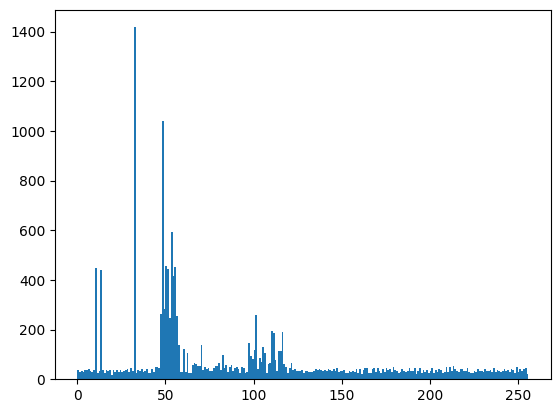

In [10]:
# TESTES TEXTO
files_text = ['DecUniversalDH.pdf', 
         'DecUniversalDH.txt', 
         'teste.txt']

msg_dec = testar(files_text[0],'teste_'+files_text[0])
msg_dec.tofile("teste_"+files_text[0])

<-------------------------------------------->
A testar ficheiro" HenryMancini-PinkPanther30s.mp3 "
ENTROPIA ->  7.982295724206529
Nº médio de bits por símbolo ->  7.993470507544582
Eficiência ->  0.9986020110629663
Demorou  0.07290792465209961 segundos a gerar a tabela huffman.
Demorou  0.05994606018066406 segundos a codificar a mensagem e tabela.
Demorou  0.10031843185424805  segundos a escrever o ficheiro
Demorou  1.4991841316223145  segundos a descodificar o ficheiro
Tamanho do ficheiro original      ->  236925
Tamanho do ficheiro descodificado ->  237406
TAXA DE COMPRESSÃO ->  0.9979739349468842
Nº de Erros ->  0


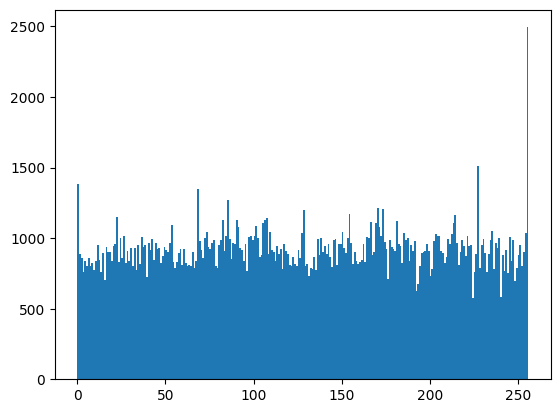

In [11]:
# Testes Áudio
files_audio = ['HenryMancini-PinkPanther30s.mp3', 
         'HenryMancini-PinkPantherC.mid']
msg_dec = testar(files_audio[0],'teste_'+files_audio[0])
msg_dec.tofile("teste_"+files_audio[0])

<-------------------------------------------->
A testar ficheiro" LenaColor.tif "
ENTROPIA ->  7.7513954966095175
Nº médio de bits por símbolo ->  7.781797470543065
Eficiência ->  0.996093193886293
Demorou  0.1941664218902588 segundos a gerar a tabela huffman.
Demorou  0.2679939270019531 segundos a codificar a mensagem e tabela.
Demorou  0.33780527114868164  segundos a escrever o ficheiro
Demorou  6.003220796585083  segundos a descodificar o ficheiro
Tamanho do ficheiro original      ->  786572
Tamanho do ficheiro descodificado ->  765807
TAXA DE COMPRESSÃO ->  1.0271151869857549
Nº de Erros ->  0


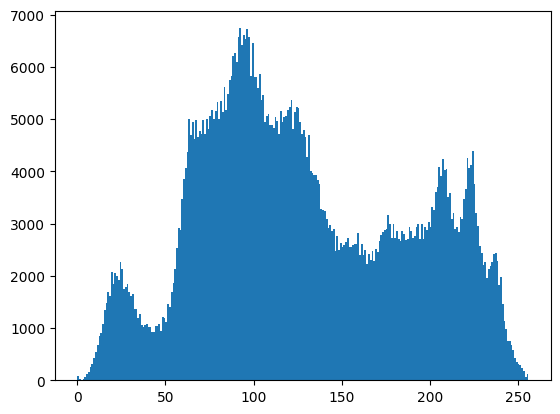

In [12]:
# Testes Imagem
files_imagem = ['LenaColor.tif', 
         'LenaGray.tif',
        ]

msg_dec = testar(files_imagem[0],'teste_'+files_imagem[0])
msg_dec.tofile("teste_"+files_imagem[0])

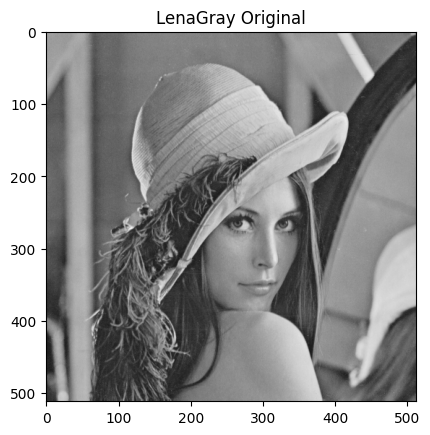

In [13]:
lena_gray = cv2.imread(files_imagem[1])
plt.title('LenaGray Original')
plt.imshow(cv2.cvtColor(lena_gray, cv2.COLOR_BGR2RGB))

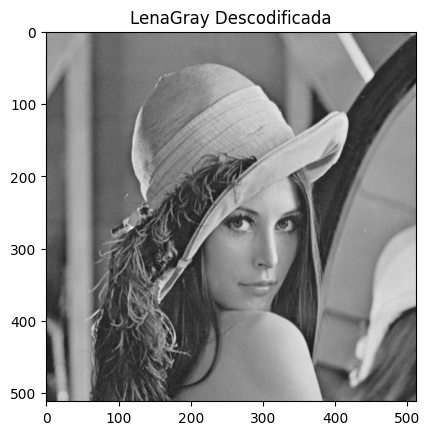

In [14]:
lena_gray = cv2.imread('teste_'+files_imagem[1])
plt.title('LenaGray Descodificada')
plt.imshow(cv2.cvtColor(lena_gray, cv2.COLOR_BGR2RGB))